In [4]:
import pep8
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [11]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [13]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Some values are 0 but they can not be zeros in real life 

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df.eq(0).sum() # 0 values in columns that 0 is not accepted means null value

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [16]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI',\
    'DiabetesPedigreeFunction','Age']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI',\
                                             'DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

In [17]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
# Taking care of missing data

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data = pd.DataFrame(imputer.fit_transform(df))
data.columns = df.columns
data.index = df.index

In [19]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [21]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0.0,3.298000,110.710121,70.935397,27.768651,142.210761,30.888434,0.429734,31.190000
1.0,4.865672,142.165573,75.147324,31.736944,180.431548,35.384757,0.550500,37.067164


# Examine correlation between features

In [22]:
corr = data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


# Visualization

### Plot Correlation between Features

<ipython-input-23-ecc46db0e951>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data.columns)
<ipython-input-23-ecc46db0e951>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data.columns)


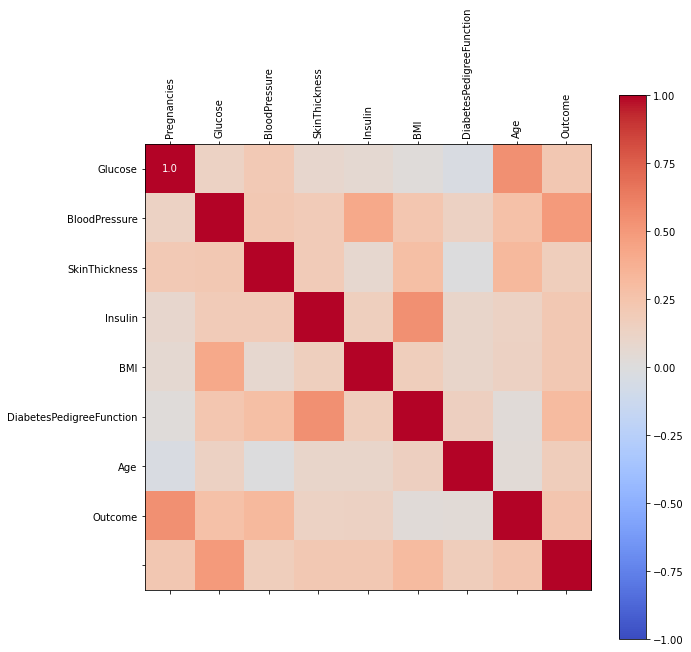

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
ax.set_xticklabels(data.columns)
plt.xticks(rotation = 90)
ax.set_yticklabels(data.columns)
ax.set_yticklabels(data.columns)
#---print the correlation factor---
for i in range(data.shape[1]):
    for j in range(9):
        text = ax.text(j, i, round(corr.iloc[i][j],2),ha="center", va="center", color="w")
        plt.show()

Index(['Outcome', 'Glucose', 'BMI', 'Insulin'], dtype='object')


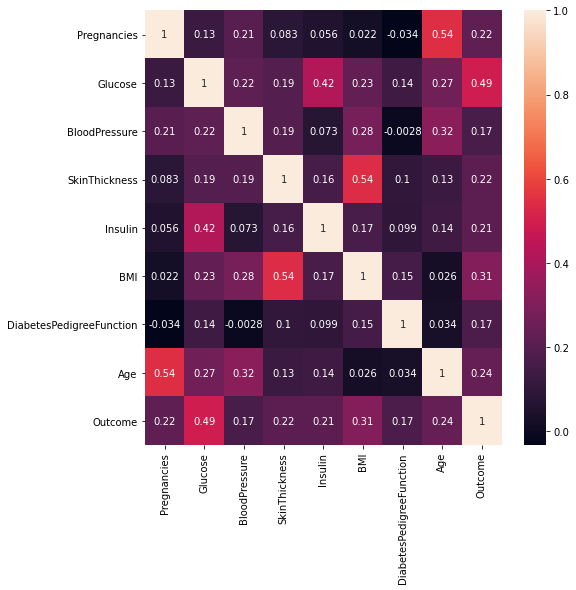

In [24]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)
#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(8,8)

#---get the top four features that has the highest correlation---
print(df.corr().nlargest(4, 'Outcome').index);

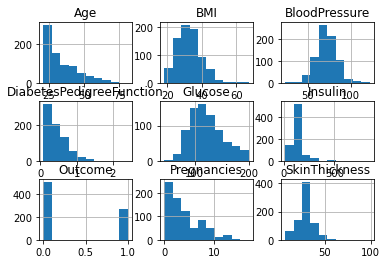

In [25]:
# histograms
data.hist()
plt.show()

In [26]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') # or default

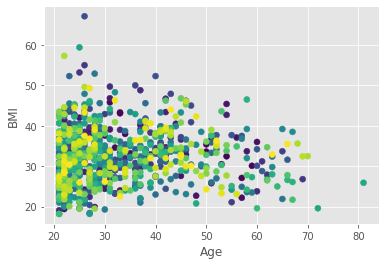

In [27]:
fig, ax = plt.subplots()
ax.scatter(data['Age'], data['BMI'], c = data.index, label = 'hello world') # c = 'data.index or to color = 'red'
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
plt.show();

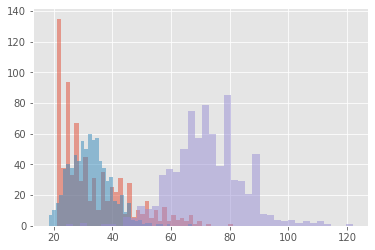

In [28]:
kwargs = dict(histtype='stepfilled', alpha=0.5, bins=40)

plt.hist(data['Age'], **kwargs)
plt.hist(data['BMI'], **kwargs)
plt.hist(data['BloodPressure'], **kwargs);

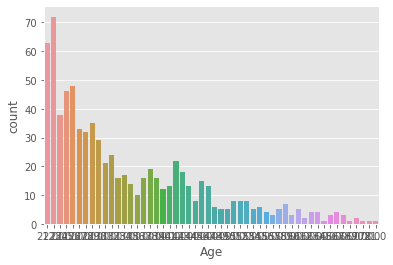

In [29]:
sns.countplot(x = 'Age', data = data)
plt.show()

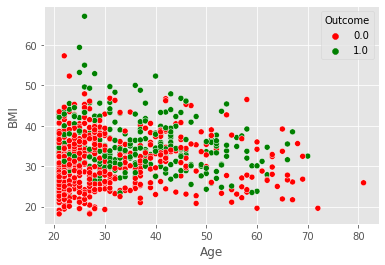

In [30]:
hue_colors = {0: 'red', 1:'green'}
sns.scatterplot(x = 'Age', y = 'BMI', data = data, hue = 'Outcome', palette = hue_colors);

# Standardize the data

In [44]:
x = data.drop(columns = 'Outcome', axis = 1)
y = data.iloc[:, -1]

In [45]:
scaler = StandardScaler()

In [46]:
x = scaler.fit_transform(x)

# Split Data

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 2)

# Simple Model

In [48]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [49]:
# Accuracy Score

In [50]:
pred = clf.predict(x_train)
accuracy = accuracy_score(pred, y_train)
accuracy

0.7736156351791531

In [51]:
preds = clf.predict(x_test)
acc = accuracy_score(preds, y_test)
acc

0.7597402597402597

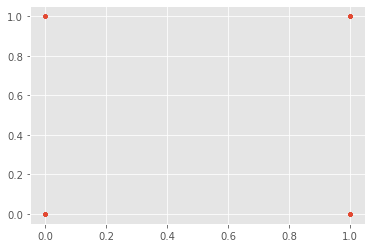

In [54]:
plt.plot(y_test, preds, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

# Evaluate Algorithms

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [106]:
result = []

In [107]:
logreg = LogisticRegression()
logreg_score = cross_val_score(logreg, x, y, cv = 10, scoring = 'accuracy').mean()

result.append(logreg_score)

print(logreg_score)

0.7695488721804511


In [108]:
cv_scores = []

folds = 10

ks = list(range(1, int(len(x) * ((folds - 1 )/ folds)), 2))


#---perform k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=folds, scoring='accuracy').mean()
    cv_scores.append(score)
#---get the maximum score---
knn_score = max(cv_scores)
#---find the optimal k that gives the highest score---
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)

The optimal number of neighbors is 27
0.7812713602187287


In [109]:
#The next algorithm we will use is Support Vector Machine (SVM). We will use
#two types of kernels for SVM: linear and RBF. The following code snippet uses
#the linear kernel:
from sklearn import svm
linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, x, y, cv=10, scoring='accuracy').mean()
print(linear_svm_score)
result.append(linear_svm_score)

0.76825017088175


In [110]:
# The next code snippet uses the RBF kernel:

rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, x, y, cv=10, scoring='accuracy').mean()
print(rbf_score)
result.append(rbf_score)

0.7539131920710869


# Selecting the Best Performing Algorithm

In [270]:
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM LinearKernel", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(result,index = algorithms)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
K Nearest Neighbors,0.781271
Logistic Regression,0.769549
SVM LinearKernel,0.768250
SVM RBF Kernel,0.753913


In [277]:
# Make predictions on validation dataset

models = [logreg, knn, linear_svm, rbf]


for model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

C:\Users\amr32\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7402597402597403
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.81       100
         1.0       0.68      0.48      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154

0.7402597402597403
              precision    recall  f1-score   support

         0.0       0.75      0.89      0.82       100
         1.0       0.69      0.46      0.56        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154

0.7597402597402597
              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83       100
         1.0       0.74      0.48      0.58        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.71       154
weighted avg     

C:\Users\amr32\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\amr32\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\amr32\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Now let's make the ANN!


In [234]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

In [235]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [236]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
model.add(Dropout(0.5))

# Adding the second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [238]:
# Compiling the ANN
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='binary_crossentropy',
                optimizer=sgd, metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(x_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
62/62 [==============================] - 0s 726us/step - loss: 0.5417 - accuracy: 0.7329
Epoch 2/100
62/62 [==============================] - 0s 708us/step - loss: 0.5239 - accuracy: 0.7638
Epoch 3/100
62/62 [==============================] - 0s 731us/step - loss: 0.5057 - accuracy: 0.7671
Epoch 4/100
62/62 [==============================] - 0s 756us/step - loss: 0.5513 - accuracy: 0.7476
Epoch 5/100
62/62 [==============================] - 0s 756us/step - loss: 0.5290 - accuracy: 0.7443
Epoch 6/100
62/62 [==============================] - 0s 724us/step - loss: 0.5371 - accuracy: 0.7459
Epoch 7/100
62/62 [==============================] - 0s 766us/step - loss: 0.5711 - accuracy: 0.7052
Epoch 8/100
62/62 [==============================] - 0s 740us/step - loss: 0.5626 - accuracy: 0.7068
Epoch 9/100
62/62 [==============================] - 0s 756us/step - loss: 0.5463 - accuracy: 0.7378
Epoch 10/100
62/62 [==============================] - 0s 772us/step - loss: 0.5352 - accura

In [240]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

In [244]:
# Reports
from sklearn.metrics import confusion_matrix, classification_report

In [245]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[93,  7],
       [32, 22]], dtype=int64)

In [247]:
report = classification_report(y_test, y_pred)
report

'              precision    recall  f1-score   support\n\n         0.0       0.74      0.93      0.83       100\n         1.0       0.76      0.41      0.53        54\n\n    accuracy                           0.75       154\n   macro avg       0.75      0.67      0.68       154\nweighted avg       0.75      0.75      0.72       154\n'

# Training and Saving the Model


In [113]:
# Since the best performing algorithm for our dataset is KNN with k = 27.
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(x, y)

import pickle
#---save the model to disk---
filename = 'diabetes.sav'
#---write to the file using write and binary mode---
pickle.dump(knn, open(filename, 'wb'))

In [114]:
#---save the model to disk---
filename = 'diabetes.sav'

#---write to the file using write and binary mode---
pickle.dump(knn, open(filename, 'wb'))

#---load the model from disk---
loaded_model = pickle.load(open(filename, 'rb'))

# Make a predictive System

In [77]:
input_data = (4, 110, 92, 0 , 0, 37.6, 0.191, 30)

inp = np.asarray(input_data).reshape(1, -1)

inp = scaler.transform(inp)

prediction = clf.predict(inp)

if prediction[0] == 0:
    print('The person is non Diabetic')
else:
    print('The person is Diabetic')

The person is non Diabetic


In [115]:
proba = loaded_model.predict_proba(inp)
print(proba)
print("Confidence: " + str(round(np.amax(proba[0]) * 100 ,2)) + "%")

[[0.92592593 0.07407407]]
Confidence: 92.59%
